In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = './data/normalization_data.xls'
df = pd.read_excel(data_path, header=None)

In [3]:
df

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


In [5]:
(df - df.min()) / (df.max() - df.min())

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [12]:
(df - df.mean()) / df.std()

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [16]:
import numpy as np
df/10**np.ceil(np.log10(df.abs().max()))

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


In [2]:
data_path = './data/discretization_data.xls'

In [3]:
df_dis = pd.read_excel(data_path)

In [4]:
df_dis.head()

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


In [5]:
coe = df_dis['肝气郁结证型系数'].copy()

In [6]:
k = 4 # number of clusters

#### 等宽离散化

In [7]:
d1 = pd.cut(coe, k, labels=range(k))

#### 等频离散化

In [9]:
w = np.linspace(0, 1, k+1)

In [10]:
w = coe.describe(percentiles=w)[4:4+k+1]

In [11]:
w[0] = 0.

In [12]:
d2 = pd.cut(coe, w, labels=range(k))

#### 聚类分析

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmodel = KMeans(n_clusters=k, n_jobs=-1)

In [15]:
coe_k = np.array(coe).reshape(len(coe),1)

In [16]:
kmodel.fit(coe_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
c = kmodel.cluster_centers_

In [18]:
c.sort(0)

In [19]:
kmodel.cluster_centers_ = c

In [20]:
d3 = kmodel.predict(coe_k)

In [21]:
import matplotlib.pyplot as plt

In [47]:
d1 = d1.astype('int')
d2 = d2.astype('int')

In [49]:
def cluster_plot(d, k):
    plt.figure(figsize=(8,3))
    for j in range(k):
        plt.plot(coe[d==j], [j for i in d[d==j]], 'o')
    plt.ylim(-0.5, k-0.5)
    return plt

<module 'matplotlib.pyplot' from '/Users/onionkev/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

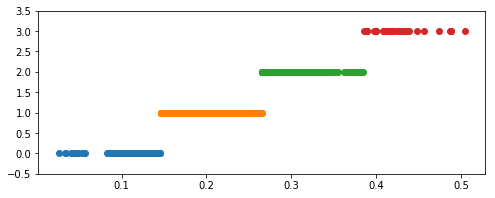

In [50]:
cluster_plot(d1, k)

<module 'matplotlib.pyplot' from '/Users/onionkev/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

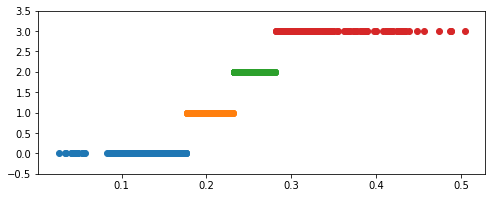

In [51]:
cluster_plot(d2, k)

<module 'matplotlib.pyplot' from '/Users/onionkev/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

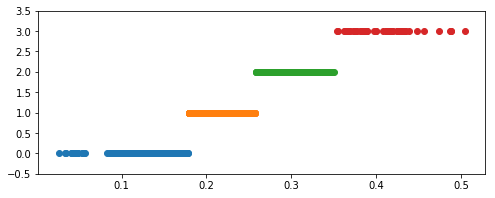

In [52]:
cluster_plot(d3, k)

## 属性构造

In [53]:
data_path = './data/electricity_data.xls'
output_path = './tmp/electricity_data.xls'

In [54]:
df = pd.read_excel(data_path)

In [55]:
df

,供入电量,供出电量
0,986,912
1,1208,1083
2,1108,975
3,1082,934
4,1285,1102


In [56]:
df['线损率'] = (df['供入电量'] - df['供出电量']) / df['供入电量']

In [61]:
df.to_excel(output_path, index=False)